헷갈리는 점 정리
- ```keras```의 ```Tokenizer```는 입력 문장이 토큰화되지 않은 통문장이어도 토큰화 및 정수 인코딩이 가능하다.

In [80]:
from tensorflow.keras.preprocessing.text import Tokenizer
t1 = Tokenizer()
t2 = Tokenizer()

In [79]:
lst1 = ['I am a boy']
lst2 = ['I','am','a','boy']

In [81]:
t1.fit_on_texts(lst1)

In [82]:
t2.fit_on_texts(lst2)

In [84]:
t1.texts_to_sequences(lst1), t1.texts_to_sequences([lst2]) 

([[1, 2, 3, 4]], [[1, 2, 3, 4]])

In [85]:
t2.texts_to_sequences(lst1), t2.texts_to_sequences([lst2]) 

([[1, 2, 3, 4]], [[1, 2, 3, 4]])

# 이진분류

## 스팸 메일 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [3]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [7]:
X_data = data['v2']
y_data = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

In [9]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1

In [15]:
max([len(lst) for lst in X_train_encoded])

189

In [16]:
maxlen = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen=maxlen)
X_train_padded.shape

(4135, 189)

In [17]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [18]:
embedding_dim = 32
hidden_dim = 32

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_dim, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # 재현율/정밀도 등이 낫지 않을까

In [19]:
history = model.fit(X_train_padded, y_train,
                    epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 4s 53ms/step - loss: 0.4387 - accuracy: 0.8552 - val_loss: 0.3576 - val_accuracy: 0.8779
Epoch 2/4
52/52 [==============================] - 2s 46ms/step - loss: 0.3462 - accuracy: 0.8742 - val_loss: 0.3281 - val_accuracy: 0.8779
Epoch 3/4
52/52 [==============================] - 2s 47ms/step - loss: 0.2561 - accuracy: 0.8930 - val_loss: 0.2668 - val_accuracy: 0.9008
Epoch 4/4
52/52 [==============================] - 2s 48ms/step - loss: 0.1415 - accuracy: 0.9652 - val_loss: 0.2070 - val_accuracy: 0.9178


In [21]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = maxlen)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 1s 20ms/step - loss: 0.2356 - accuracy: 0.9043

 테스트 정확도: 0.9043


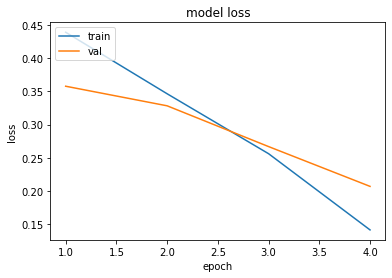

In [23]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## IMDB 리뷰 감성 분류

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [54]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [55]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [56]:
print(type(X_train[0]), X_train[0])

<class 'list'> [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [59]:
len(X_train[0]), len(X_train[1])

(218, 189)

In [60]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [61]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [63]:
vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [65]:
embedding_dim = 100
hidden_dim = 128

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_dim))
model.add(Dense(1, activation='sigmoid'))

es= EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc',
                     mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', metrics=['acc'])

In [66]:
history = model.fit(X_train, y_train, 
                    epochs=15, callbacks=[es, mc],
                    batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.4964 - acc: 0.7576
Epoch 00001: val_acc improved from -inf to 0.84460, saving model to GRU_model.h5
313/313 [==============================] - 276s 870ms/step - loss: 0.4964 - acc: 0.7576 - val_loss: 0.3541 - val_acc: 0.8446
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3242 - acc: 0.8711
Epoch 00002: val_acc improved from 0.84460 to 0.85300, saving model to GRU_model.h5
313/313 [==============================] - 258s 824ms/step - loss: 0.3242 - acc: 0.8711 - val_loss: 0.3434 - val_acc: 0.8530
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2492 - acc: 0.9051
Epoch 00003: val_acc improved from 0.85300 to 0.87880, saving model to GRU_model.h5
313/313 [==============================] - 259s 826ms/step - loss: 0.2492 - acc: 0.9051 - val_loss: 0.2936 - val_acc: 0.8788
Epoch 4/15
177/313 [===============>..............] - ETA: 1:44 - loss: 0.1991 - acc: 0.9256

KeyboardInterrupt: ignored

In [ ]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

## 네이버 영화 리뷰 감성 분류
- 네이버 쇼핑 리뷰 감성 분류, 한국어 스팀 리뷰 감성 분류는 전처리 과정이 똑같음 (모델링만 GRU, Bidirection 차이)

In [116]:
!pip install konlpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 전처리

In [117]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f594d6fa550>)

In [118]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [119]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [120]:
# 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [121]:
print(train_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [122]:
# 25857
train_data[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [123]:
train_data.dropna(how='any', inplace=True)
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [166]:
# [^] 해당 문자를 제외한 문자 매치
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [169]:
# ^문자: 해당 문자로 시작된 문자열 매치
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [170]:
train_data.dropna(how='any',inplace=True)

In [171]:
len(train_data)

145393

In [172]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48852


### 토큰화
- 한국어이므로 kears의 tokenizer를 통해 토큰화를 시키는 것은 부적절해 보임. 

In [173]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [174]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [175]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 145393/145393 [16:51<00:00, 143.78it/s]


In [176]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 48852/48852 [05:01<00:00, 161.76it/s]


### 정수 인코딩

In [177]:
threshold = 3

total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

for word, count in tokenizer.word_counts.items():

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(count < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + count

In [178]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2326


In [180]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)

# 정수 인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [181]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [182]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [183]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

144074
144074


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### 패딩

In [184]:
max_len = 30

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### modeling

In [185]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [187]:
embedding_dim = 100
hidden_dim = 128

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_dim))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min',patience=4, verbose=1)
ck = ModelCheckpoint('best_model.h5',monitor='val_acc',
                     mode='max', save_best_only=True, verbose=1)

In [189]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, 
                    callbacks=[es, ck], validation_split=0.2)

Epoch 1/15
1801/1801 [==============================] - ETA: 0s - loss: 0.3983 - acc: 0.8154
Epoch 00001: val_acc improved from -inf to 0.83325, saving model to best_model.h5
1801/1801 [==============================] - 156s 84ms/step - loss: 0.3983 - acc: 0.8154 - val_loss: 0.3710 - val_acc: 0.8332
Epoch 2/15
1801/1801 [==============================] - ETA: 0s - loss: 0.3501 - acc: 0.8422
Epoch 00002: val_acc improved from 0.83325 to 0.84352, saving model to best_model.h5
1801/1801 [==============================] - 143s 80ms/step - loss: 0.3501 - acc: 0.8422 - val_loss: 0.3556 - val_acc: 0.8435
Epoch 3/15
1801/1801 [==============================] - ETA: 0s - loss: 0.3282 - acc: 0.8524
Epoch 00003: val_acc improved from 0.84352 to 0.84466, saving model to best_model.h5
1801/1801 [==============================] - 143s 80ms/step - loss: 0.3282 - acc: 0.8524 - val_loss: 0.3506 - val_acc: 0.8447
Epoch 4/15
1801/1801 [==============================] - ETA: 0s - loss: 0.3130 - acc: 0.860

In [190]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 20s 13ms/step - loss: 0.3729 - acc: 0.8363

 테스트 정확도: 0.8363


# 다중분류


## 로이터 뉴스 분류하기

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [25]:
# 불러오는 단어 종류 무제한, 8:2 학습/테스트 비율
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         test_split=0.2)

print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

2121728/2110848 [==============================] - 0s 0us/step
훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [27]:
X_train.shape

(8982,)

In [29]:
type(X_train[0])

list

In [30]:
len(X_train[0]), len(X_train[1])

(87, 56)

데이터는 1D array이며, 각 원소는 길이가 각기 다른 list다. 즉, padding이 안되어 있음.

In [31]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(sample) for sample in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

뉴스 기사의 최대 길이 :2376
뉴스 기사의 평균 길이 :145.5398574927633


In [35]:
len(np.unique(y_train))

46

In [44]:
word_to_index = reuters.get_word_index()

# 0: pad, 1: sos, 2: unk(oov) 
idx_to_word = {idx+3:word for word, idx in word_to_index.items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  idx_to_word[index] = token

In [47]:
' '.join([idx_to_word[index] for index in X_train[0]])

'<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [49]:
# 학습에서는 빈도수 상위 1000위만 사용
vocab_size = 1000
max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size,
                                                         test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 다중 분류이므로 레이블 값을 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
embedding_dim = 128
hidden_dim = 128
num_classes = 46

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_dim))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=4)
mc = ModelCheckpoint('best_model.h5',
                     monitor='val_acc',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [51]:
# validation_split 대신 validation data를 테스트 데이터로 직접 지정
# 그러나 이는 지양해야 함
history = model.fit(X_train, y_train,
                    batch_size=128, epochs=30,
                    callbacks=[es, mc],
                    validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6060 - acc: 0.3473
Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
71/71 [==============================] - 32s 400ms/step - loss: 2.6060 - acc: 0.3473 - val_loss: 2.4160 - val_acc: 0.3620
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 2.2734 - acc: 0.3886
Epoch 00002: val_acc improved from 0.36198 to 0.50757, saving model to best_model.h5
71/71 [==============================] - 31s 439ms/step - loss: 2.2734 - acc: 0.3886 - val_loss: 2.0359 - val_acc: 0.5076
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.8628 - acc: 0.5149
Epoch 00003: val_acc improved from 0.50757 to 0.50846, saving model to best_model.h5
71/71 [==============================] - 37s 519ms/step - loss: 1.8628 - acc: 0.5149 - val_loss: 1.8163 - val_acc: 0.5085
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.7142 - acc: 0.5536
Epoch 00004: val_acc impro

In [52]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 32ms/step - loss: 1.1970 - acc: 0.7213

 테스트 정확도: 0.7213
